In [4]:
%config InlineBackend.figure_format = 'svg' # change output plot display format to 'svg'

# import the required modules for this notebook
import numpy
import matplotlib.pyplot as plt

# import the helper functions from the parent directory,
# these help with things like graph plotting and notebook layout
import sys
sys.path.append('..')
from helper_functions import *

# set things like fonts etc - comes from helper_functions
set_notebook_preferences()

# add a show/hide code button - also from helper_functions
toggle_code(title = "setup code")

## Linear regression

This section will introduce **linear regression**, **least squares fitting**, and the relationship to **probabilistic modelling** and **maximum likelihood estimation**.

Let's start by considering a toy dataset (shown below) consisting of $N=10$ scalar input and output pairs $\{ x_{n}, y_{n} \}_{n=1}^N$. Our goal will be to make predictions at new input locations $x^\star$.


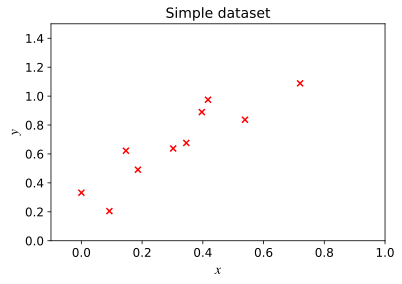

In [5]:
x_lin = np.load('reg_lin_x.npy') # np.load loads a prepared numpy array from the file 'reg_line_x.npy'
y_lin = np.load('reg_lin_y.npy') # same for 'reg_line_y.npy'

plt.scatter(x_lin, y_lin, marker = 'x', color = 'red') # scatter plot of the inputs, x, and outputs, y
beautify_plot({"title":"Simple dataset", "x":"$x$", "y":"$y$"})
matplotlib.pyplot.xlim((-0.1, 1)) 
matplotlib.pyplot.ylim((0, 1.5)) 
plt.show() # show the scatter plot

toggle_code()

A simple and popular approach to regression is fit a linear function to the data and use this to make predictions at new input locations. Denoting the slope of the linear function $w_1$ and intercept $w_0$, we have

\begin{align}
f(x) = w_1 x + w_0.
\end{align}

### Least Squares Fitting

The task is now to estimate the parameters $w_0$ and $w_1$ from the data. A straight line clearly can't pass precisely through all of the datapoints because they aren't collinear, but it is clear that some parameter choices will result in straight lines that go closer to data than others. A popular measure for the goodness of fit is the sum of square distances between each data point and $f(x_n)$, 


\begin{align}
C_2 = \sum^N_{n = 1} \big[y_n - f(x_n) \big]^2  = \sum^N_{n = 1} \big[y_n - (w_1x_n + w_0)\big]^2 \geq 0
\end{align}

where equality with 0 holds only if \\(~y_n = w_1x_n + w_0\\) for every \\(n\\). By this measure, the optimal fit is the fit which minimises $C_2$. This cost function, although intuitive, lacks justification. We will return to this issue at the end of this section.

The following animation encapsulates the proposed approach problem. In the left plot, we visualise lines corresponding to different settings of the parameters $(w_0, w_1)$ in data space $(x,y)$. The distances between the observed data and the fit are shown by grey dashes. The sum of the squares of these distances is $C_2$. The right plot shows contours of the cost $C_2$ in parameter space with blue indicating the cost is low and red high. The black cross shows the parameters of the line displayed on the left. When the cross moves horizontally in parameter space the intercept of the line changes and when the cross moves vertically the slope changes.

<div class="row">
  <div class="column">
    <img src="reg_lin_weight_excursion.gif" style="width:80%; float: center; padding: 0px">
  </div>
</div>

Our goal is to find the parameters \\((w_0, w_1)\\) which minimise the cost. Since the cost has a simple form (it is a quadratic function of the parameters), this minimisation has an analytic solution. In order to derive that solution, we will first write the cost in a more compact and general form and second use differentiation to solve for the minimum. 


**Step 1**: writing \\(C_2\\) in a more convenient form

The cost can be written in terms of a  vector $\mathbf{w}$ containing the model parameters, a vector $\mathbf{y}$ that contains the training outputs, and a matrix $X$ which contains the inputs augmented with a column of ones. 

\\[
C_2 = \big|\big|\mathbf{y} - \mathbf{X}\mathbf{w}\big|\big|^2 = \big(\mathbf{y} - \mathbf{X}\mathbf{w}\big)^\top \big(\mathbf{y} - \mathbf{X}\mathbf{w}\big)
\\]


\begin{equation}
\text{where}~~~
\mathbf{y} = \begin{pmatrix}
y_1\\\
y_2\\\
\vdots \\\
y_N
\end{pmatrix}, ~~~
\mathbf{X} =  \begin{pmatrix}
1 & x_1\\\
1 & x_2\\
\vdots & \vdots \\\
1 & x_N
\end{pmatrix}, ~~~
\mathbf{w} =  \begin{pmatrix}
w_0\\\
w_1
\end{pmatrix}
\end{equation}

<details>
<summary>Simplification of the cost in more detail</summary>
<div>
\begin{align}
    C_2 &= \sum^N_{n = 1} \big[y_n - (w_1x_n + w_0)\big]^2\\
    ~\\
    &= \sum^N_{n = 1} \big[\mathbf{y}_n - \sum^2_{j = 1}\mathbf{X}_{nj}\mathbf{w}_j\big]^2\\
    ~\\
    &= \sum^N_{n = 1} \big[\mathbf{y}_n - \left(\mathbf{X}\mathbf{w}\right)_n\big]^2\\
    ~\\
    &= \big(\mathbf{y} - \mathbf{X}\mathbf{w}\big)^\top \big(\mathbf{y} - \mathbf{X}\mathbf{w}\big)\\
\end{align}
</div>
</details>

**Step 2**: using differentiation to solve for the minimum.

Letting the derivative of a quantity \\(f\\) with respect to a vector \\(\mathbf{v}\\) to have have elements

\\[
\bigg(\frac{\partial f}{\partial \mathbf{v}}\bigg)_i = \frac{\partial f}{\partial \mathbf{v}_i}
\\]

we differentiate \\(C_2\\), set to zero, and obtain the closed form solution:

\begin{align}\frac{\partial C_2}{\partial \mathbf{w}} &= -2\mathbf{X}^\top\big(\mathbf{y} - \mathbf{X}\mathbf{w}\big)=0\\
~\\\
\implies & \mathbf{X}^\top\mathbf{X}\mathbf{w} - \mathbf{X}^\top\mathbf{y} = 0\\
~\\\
\implies &\boxed{\mathbf{w} = \big( \mathbf{X}^\top\mathbf{X}\big)^{-1}\mathbf{X}^\top \mathbf{y}}
\end{align}

<details>
<summary>Derivatives in detail</summary>
<div>
Here we show a more detailed derivation of the equality $\frac{\partial C_2}{\partial \mathbf{w}} = -2\mathbf{X}^\top\big(\mathbf{y} - \mathbf{X}\mathbf{w}\big)$.

\begin{align}
\bigg(\frac{\partial C_2}{\partial \mathbf{w}}\bigg)_i &= \frac{\partial C_2}{\partial \mathbf{w}_i} = \frac{\partial}{\partial \mathbf{w}_i} \bigg[\big(\mathbf{y} - \mathbf{X}\mathbf{w}\big)^\top \big(\mathbf{y} - \mathbf{X}\mathbf{w}\big)\bigg] = \frac{\partial}{\partial \mathbf{w}_i} \sum_n \bigg[\big(\mathbf{y}_n - \sum_j\mathbf{X}_{nj}\mathbf{w}_j\big) \big(\mathbf{y}_n - \sum_j\mathbf{X}_{nj}\mathbf{w}_j\big)\bigg]\\
~\\
&= 2\sum_n \bigg[\big(\mathbf{y}_n - \sum_j\mathbf{X}_{nj}\mathbf{w}_j\big) \frac{\partial}{\partial \mathbf{w}_i} \big(\mathbf{y}_n - \sum_j\mathbf{X}_{nj}\mathbf{w}_j\big)\bigg]\\
~\\
&= -2\sum_n \bigg[\big(\mathbf{y}_n - \sum_j\mathbf{X}_{nj}\mathbf{w}_j\big) \big(\sum_j\mathbf{X}_{nj} \frac{\partial \mathbf{w}_j}{\partial \mathbf{w}_i}\big)\bigg]\\
~\\
&= -2\sum_n \bigg[\big(\mathbf{y}_n - \sum_j\mathbf{X}_{nj}\mathbf{w}_j\big) \big(\sum_j\mathbf{X}_{nj} \delta_{ij}\big)\bigg]\\
~\\
&= -2\sum_n \bigg[\big(\mathbf{y}_n - \sum_j\mathbf{X}_{nj}\mathbf{w}_j\big)\mathbf{X}_{ni}\bigg]\\
~\\
&= -2\sum_n \bigg[\mathbf{X}^\top_{in}\big(\mathbf{y}_n - \sum_j\mathbf{X}_{nj}\mathbf{w}_j\big)\bigg]\\
~\\
&= -2 \left[\mathbf{X}^\top \big(\mathbf{y} - \mathbf{X}\mathbf{w}\big)\right]_i\\
\end{align}
</div>
</details>

As promised, when the matrix $\mathbf{X}^\top\mathbf{X}$ is invertable, we have a closed form solution for \\(\mathbf{w}\\) which extremizes \\(C_2\\). You can convince yourself this is a minimum either by taking a second derivative or by considering the quadratic form of \\(C_2\\) and what happens in the limit of large \\(\mathbf{w}\\). 


<div class="further_box">
** Further reading and information **<br><br>

In the expression for the least squares solution for the weights

$$\mathbf{w} = \big( \mathbf{X}^\top\mathbf{X}\big)^{-1}\mathbf{X}^\top \mathbf{y}$$

the matrix $\big( \mathbf{X}^\top\mathbf{X}\big)^{-1}\mathbf{X}^\top$ is a generalization of the inverse of a matrix for non-square matrices, called the __[Moore-Penrose pseudoinverse](http://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html)__ having the property 

$$\bigg[\big( \mathbf{X}^\top\mathbf{X}\big)^{-1}\mathbf{X}^\top\bigg] \mathbf{X} = \big( \mathbf{X}^\top\mathbf{X}\big)^{-1}\mathbf{X}^\top\mathbf{X} = \mathbf{I}$$

Note that when $\mathbf{X}^\top\mathbf{X}$ is not invertable there is an infinity of solutions to the least squares problem. This occurs when the number of unique datapoints $N'$ is smaller than the number of parameters we are fitting. For example, if we have a single datapoint, there are many ways of constructing a straight line that passes through the point. <br><br>

More generally, when the inputs are $D$ dimensional or when we're fitting non-linear models with $D$ basis functions the least squares solution is not unique when $N'<D$. This is one of the motivations for approaches considered later that [regularise the least squares solution](regression_regularisation.ipynb) and return unique solutions even when $N'<D$.  
</div>


Implementing this solution is straightforward because of the closed-form solution:

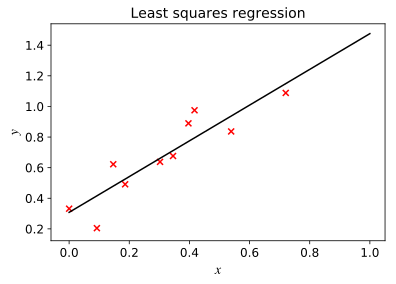

In [6]:
ones = np.ones_like(x_lin) # create a vector of 1's with the same length as x

X = np.stack([ones, x_lin], axis = 1) # stack 1's and x's to get the X matrix having the 1's and x's as columns


# compute the optimal w using the Moore-Penrose pseudoinverse
w = np.linalg.solve( (X.T).dot(X) , (X.T).dot(y_lin) )

# The above line is equivalent to the following: 
# w = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y_lin) 
# but unlike this approach it avoids explicitly computing the matrix inverse, which can be numerically unstable, 
# instead it uses a linear solver, which is more stable. In general, if you don't explicitly need a matrix inverse, 
# you should avoid computing it.

x_pred = np.linspace(0, 1, 100) # 100 points equispaced between 0 and 1

y_pred = (w[1] * x_pred) + w[0] # evaluate the linear trendline at the values of x above

plt.plot(x_pred, y_pred, color = 'black') # plot the trendline
plt.scatter(x_lin, y_lin, marker = 'x', color = 'red') # plot the datapoints
beautify_plot({"title":"Least squares regression", "x":"$x$", "y":"$y$"})
plt.show()

toggle_code()

**Critique of the Least Squares fitting approach**

Is the least squares procedure a sensible way to fit a linear model and return predictions? 

One weakness in the rationale for the approach outlined above is that the cost function was drawn out of a hat. For example, instead of minimising the squared error, why not use an alternative cost in the family 

\begin{align}
C_{p} = \sum^N_{n = 1} \big|y_n - (w_1x_n + w_0)\big|^p,~\text{for some $p > 0$}.
\end{align}

From a _computational_ perspective, minimising \\(C_2\\) is arguably a sensible choice as it yields a closed-form solution for the parameters (other choices do not), but it is not immediately clear if it is a _statistically_ superior approach. However, in the next section we will show that minimising \\(C_2\\) is equivalent to a probabilistic approach that finds the parameters that are most likely, given the data, under the assumption of Gaussian observation noise. 

Another weakness in the least squares approach is that it does not return uncertainty estimates in either the parameter estimates or the predictions. Framing the estimation as a probabilistic inference problem will later enable us to apply full blown probabilistic inference which does return uncertainties.

### Maximum likelihood fitting

The least squares approach assumed that the function underlying the data was a straight line, but it did not explicitly specify how the observed data relates to this line. One simple assumption is that they are produced by adding independent and identically distributed Gaussian noise with zero mean and variance $\sigma_{y}^2$,

\\[y_n = w_0 + w_1 x_n + \epsilon_n,~\text{where}~ \epsilon_n \sim \mathcal{N}(0, \sigma_{y}^2).\\]

This expression describes how to sample the outputs given the inputs and the model parameters, by computing the value the linear function takes at $x_n$ and adding Gaussian noise. We can write down an equivalent expression for the probability density of the outputs $\mathbf{y}$ given the inputs and model parameters ($\mathbf{X}, \mathbf{w}, \sigma_y^2$),

\\[p(\mathbf{y}\mid\mathbf{X}, \mathbf{w}, \sigma_y^2) = \frac{1}{(2\pi \sigma_y^2)^{N/2}}\text{exp}\big(-\frac{1}{2\sigma_y^2}(\mathbf{y} - \mathbf{X}\mathbf{w})^\top (\mathbf{y} - \mathbf{X}\mathbf{w})\big)\\]

This function is also known as the **likelihood of the parameters** and it can be used for fitting. The **setting of the parameters that makes the observed data most probable is called the  maximum likelihood estimate**. 

One way to find the parameters \\(\mathbf{w}\\) that maximise the likelihood is by directly taking derivatives of $p(\mathbf{y}\mid\mathbf{X}, \mathbf{w}, \sigma_y^2)$. However, we can make our lives easier by maximising the log of the likelihood. This is equivalent since the logarithm is a monotonically increasing function (that is $\log(x_1) > \log(x_2)$ if $x_1 > x_2$ ), and the location of maxima and minima are unchanged by applying a monotonically increasing function. **It is often simpler to handle logarithms of probabilistic quantities** since:

1. probabilities often decompose into products which become sums once the logarithm is taken, and


2. many widely used probability distributions often involve the exponential function which simplifies after taking the log (the Gaussian being such a case). 

<details>
<summary>More details on the extrema of monotonically transformed functions</summary>
<div>
Consider a quantity \\(\mathcal{Q}(x)\\) with a (local or global) maximum at \\(x^*\\), and a  monotonic function \\(f\\).<br><br> 

Now consider $Q$ in a neighbourhood around $x^*$.  Denoting a point in this neighbourhood as $x^*+\delta$ we can restrict the size of neighbourhood by limiting the magnitude of the perturbation $|\delta| < \epsilon$.  For sufficiently small $\epsilon$ due to  $x^*$ being a maximum, $Q(x^*)>Q(x^*+\delta)$. <br><br>

Now, we can apply the function $f$ to both sides of this inequality and use the fact that it is monotonic to give
    
\begin{align}
f(Q(x^*))>f(Q(x^*+\delta)) \;\; \forall \;\; |\delta| < \epsilon
\end{align}

This demonstrates that $x^*$ is also a (local/global) maximum of $f(Q(x))$.

</div>

</details>

The **log-likelihood** is

\\[\mathcal{L}(\mathbf{w}) = \text{log}~ p(\mathbf{y}\mid\mathbf{X}, \mathbf{w}, \sigma_y^2) = -\frac{N}{2}\log(2\pi \sigma_y^2) -\frac{1}{2\sigma_y^2}(\mathbf{y} - \mathbf{X}\mathbf{w})^\top (\mathbf{y} - \mathbf{X}\mathbf{w})\\]

maximising this quantity is equivalent to **minimising** the negative log-likelihood

\\[-\mathcal{L}(\mathbf{w}) = \frac{N}{2}\log(2\pi \sigma_y^2) +\frac{1}{2\sigma_y^2}(\mathbf{y} - \mathbf{X}\mathbf{w})^\top (\mathbf{y} - \mathbf{X}\mathbf{w})\\]

Notice that the term \\(\frac{N}{2}\log(2\pi \sigma_y^2)\\) is independent of \\(\mathbf{w}\\), so minimising the negative log-likelihood is equivalent to minimizing the least-squares error \\(-\\) exactly the same criterion we had before:

\\[\boxed{\text{Least squares} \equiv \text{minimize}~ (\mathbf{y} - \mathbf{X}\mathbf{w})^\top (\mathbf{y} - \mathbf{X}\mathbf{w}) \Leftrightarrow \text{Maximum-likelihood}}\\]

So the squared error assumption is equivalent to assuming that the observed data have been corrupted by Gaussian noise whose variance is fixed across the input space. One of the benefits of this new perpective (i.e. in terms of a probabilistic model and a specific inference scheme) is that the implicit assumptions are revealed, their suitability assessed, and  modifications can be made. For example, the model could be generalised to include noise whose variance depends on the input location. Moreover, it might be important to infer the noise level \\(\sigma_y\\). The maximum likelihood approach paves the way to the Bayesian modelling approach where the task of infering the model weights retains uncertainty and incorporates prior knowledge.

In the next [notebook](regression_non_linear.ipynb), we look at how to adapt our linear regression model to better deal with non-linear datasets that cannot be so accurately fit by a straight line.

## Summary

Having covered linear regression, you should now understand:

1. Why the sum-of-squared-errors is used as a measure of fit
2. How to manipulate the sum-of-square-errors cost into different forms
3. How to derive the least squares estimate for the parameters of a linear model
4. Why the least squares estimate is equivalent to the maximum likelihood estimate (under an i.i.d. Gaussian noise assumption)


## Questions

1. **Probabilistic models for regression**

  A machine learner observes two separate regression datasets comprising scalar inputs and outputs $\{ x_n, y_n \}_{n=1}^N$ shown below.   
   
  <div class="row">
  <div class="column">
    <img src="dataset_regression.svg" alt="Snow" style="width:90%; float: center; padding: 0px; padding : 20px">
  </div>
</div>

  * Suggest a suitable regression model, $p(y_n|x_n)$ for the dataset A. Indicate sensible settings for the parameters in your proposed model where possible. Explain your modelling choices.  
  
  * Suggest a suitable regression model, $p(y_n|x_n)$ for the dataset B. Indicate sensible settings for the parameters in your proposed model where possible. Explain your modelling choices. 

<details>
<summary>Answer</summary>
<div class="row">
  <div class="column">
    <img src="solution-prob_mod.png" alt="Snow" style="width:95%; float: center; padding: 0px; padding : 20px">
  </div>
</div>
</details>

 
2. **Maximum-likelihood learning for a simple regression model**

  Consider a regression problem where the data comprise $N$ scalar inputs and outputs, $\mathcal{D} = \{ (x_1, y_1), ..., (x_N,y_N)\}$, and the goal is to predict $y$ from $x$. 
    
  Assume a very simple linear model, $y_n = a x_n + \epsilon_n$, where the noise $\epsilon_n$ is iid Gaussian with zero mean and variance 1.

  * Provide an expression for the log-likelihood of the parameter $a$. 
  * Compute the maximum likelihood estimate for $a$. 


<details>
<summary>Answer</summary>
<div class="row">
  <div class="column">
    <img src="solution-ml.png" alt="Snow" style="width:95%; float: center; padding: 0px; padding : 20px">
  </div>
</div>
</details>

3. **Maximum-likelihood learning for multi-output regression** 

  A data-scientist has collected a regression dataset comprising $N$ scalar inputs ($\{x_n\}_{n=1}^N$) and $N$ scalar outputs ($\{y_n\}_{n=1}^N$). Their goal is to predict $y$ from $x$ and they have assumed a very simple linear model, $y_n = a x_n + \epsilon_n$.
  
  The data-scientist also has access to a second set of outputs ($\{z_n\}_{n=1}^N$) that are well described by the model $z_n = x_n + \epsilon'_n$.

  The noise variables $\epsilon_n$ and $\epsilon'_n$  are known to be iid zero mean correlated Gaussian variables

  \begin{align}
p\left( \left[ \begin{array}{c} \epsilon_n\\ \epsilon'_n \end{array} \right ] \right) = \mathcal{N}\left( \left[ \begin{array}{c} \epsilon_n\\ \epsilon'_n \end{array} \right ]; \mathbf{0}, \Sigma \right)  \;\; \text{where} \;\; \; \Sigma^{-1} = \left[ \begin{array}{cc} 1 & 0.5 \\ 0.5 & 1 \end{array} \right ].  \nonumber
\end{align}

    

  * Provide an expression for the log-likelihood of the parameter $a$. 
  * Compute the maximum likelihood estimate for $a$. 
  * Do the additional outputs $\{z_n\}_{n=1}^N$ provide useful additional information for estimating $a$? Explain your reasoning.


  The formula for the probability density of a multivariate Gaussian distribution of mean $\mu$ and covariance $\Sigma$ is given by
\begin{align}
\mathcal{N}(\mathbf{x};\mu,\Sigma) = \frac{1}{\sqrt{\text{det}(2 \pi \Sigma)}} \exp\left(-\frac{1}{2} (\mathbf{x} - \mathbf{\mu})^{\top} \Sigma^{-1}  (\mathbf{x} - \mathbf{\mu})\right). \nonumber
\end{align}

 <details>
<summary>Answer</summary>
<div class="row">
  <div class="column">
    <img src="solution-multi-output-1.png" alt="Snow" style="width:95%; float: center; padding: 0px; padding : 20px">
          <img src="solution-multi-output-2.png" alt="Snow" style="width:95%; float: center; padding: 0px; padding : 20px">
  </div>
</div>
</details>